# Importing packages

In [1]:
# The basics
import numpy as np
import pandas as pd

# Cross validation and model selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Models
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

# Plotting
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import matplotlib.ticker as ticker

# Helper functions

### Actual vs. Predicted plotter function

In [2]:
def plot_actual_vs_pred(actual, pred, title, info):
    
    # Gasses
    gasses = ['NO', 'NO_2', 'NH_3']
    
    # Getting axis limits to have uniform plots for all gasses
    axis_min = pred.min()
    axis_max = pred.max()
    
    print(axis_min)
    print(axis_max)
    
    # Dividing into 3 subplots
    fig, axs = plt.subplots(1,3, figsize=(30,10), dpi = 300)
    
    # Main title
    fig.suptitle(title, fontsize=35)
    
     # Axis params
    plt.xticks(rotation=45)
    
    
    for i, ax in enumerate(axs.flat):
        
        # Data
        ax.scatter(actual[:,i], pred[:,i], c='black', alpha = 0.4)
        
        # Identity line y=x
        line = mlines.Line2D([0, 1], [0, 1], color='red')
        transform = ax.transAxes
        line.set_transform(transform)
        ax.add_line(line)
        
        # Text box with information of the fit
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.6)
        textstr = info
        ax.text(0.05, 0.95,
                textstr,
                transform = ax.transAxes,
                fontsize = 20,
                verticalalignment = 'top',
                bbox = props,
                fontname = 'Helvetica'
               )
        
        # Plot title and axis names
        ax.set_title(f'${gasses[i]}$', fontname = 'Helvetica', fontsize = 30)
        ax.set_ylabel('Predicted (ppm)', fontname = 'Helvetica', fontsize = 25)
        ax.set_xlabel('Actual (ppm)', fontname = 'Helvetica', fontsize = 25)
        
        # Setting axis limits (defined above)
        if axis_min >0 or axis_max < 80:
            ax.set_xlim(-5, 85)
            ax.set_ylim(-5, 85)
        else:
            ax.set_xlim(axis_min + 5, axis_max + 5)
            ax.set_ylim(axis_min + 5, axis_max + 5)
        
        # Setting minor ticks in fixed levels (5, 10, 20, 40, 80)
        ax.xaxis.set_minor_locator(ticker.FixedLocator([5,10,20,40,80]))
        ax.yaxis.set_minor_locator(ticker.FixedLocator([5,10,20,40,80]))
        
        # Major tick style
        ax.grid(linestyle='-', linewidth=0.5)
        ax.tick_params(axis='x', which='major', labelsize=20, rotation = 45)
        # Font size of tick labels (numbers)
        ax.tick_params(axis='both', which='major', labelsize=20)
        
        # Minor tick style
        ax.grid(axis = 'x', which = 'minor',linestyle=':', linewidth=0.5,color = "fuchsia")
        ax.tick_params(which = 'minor', axis="x", direction="in",
                       length=10, width=3, color="fuchsia", rotation = 45, labelsize = 12)
        ax.xaxis.set_minor_formatter('{x:.0f}')
        
        
    
    plt.show()

# Reading data

**Note**: Refer to `real_data.ipynb` to check preprocessing steps.

In [3]:
sensor1 = pd.read_csv('../data/sensor1.csv')

In [4]:
sensor1

,exposure,NO,NO2,NH3,0.05-1-slope-0,0.05-1-slope-1,0.05-1-slope-2,0.05-1-slope-3,0.05-1-slope-4,0.05-1-slope-5,...,2500.0-1-avg-230,2500.0-1-avg-231,5000.0-1-avg-232,5000.0-1-avg-233,5000.0-1-avg-234,5000.0-1-avg-235,5000.0-1-avg-236,5000.0-1-avg-237,5000.0-1-avg-238,5000.0-1-avg-239
0,1.0,10.0,5.0,20.0,-18.855169,-28.289268,-0.390916,-0.234549,-0.143336,0.026061,...,36.095859,36.118662,35.978584,35.880855,35.880855,35.867825,35.874340,35.825476,35.840135,35.845021
1,1.0,10.0,5.0,20.0,-28.979886,-9.251672,-0.247580,-0.169397,-0.218261,0.061895,...,36.115405,36.144723,35.978584,35.962296,35.919947,35.899858,35.910174,35.861309,35.884113,35.869996
2,1.0,10.0,5.0,20.0,-25.431240,-12.874158,-0.221519,-0.234549,0.026061,-0.312733,...,36.163183,36.141466,35.962296,35.926462,35.916689,35.910174,35.906916,35.903659,35.913432,35.900401
3,1.0,10.0,5.0,20.0,-30.126572,-8.196200,-0.260610,-0.091214,-0.130305,-0.182427,...,36.170784,36.164269,36.076313,35.978584,35.946008,35.942750,35.910174,35.933792,35.939493,35.900401
4,2.0,20.0,40.0,40.0,-19.506695,-27.051368,-0.456068,-0.403946,-0.208488,-0.256267,...,35.955781,35.929720,35.805930,35.760323,35.711458,35.688655,35.685397,35.675624,35.685397,35.665852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,374.0,80.0,80.0,40.0,-27.937445,-10.891346,-0.206317,0.021718,-0.130306,-0.152023,...,34.395375,34.410849,34.261813,34.184172,34.165170,34.203175,34.164084,34.132593,34.151596,34.127164
1496,375.0,20.0,80.0,5.0,-24.358394,-22.933723,-0.206316,-0.284500,-0.078183,-0.180256,...,34.395918,34.374201,34.276472,34.212948,34.193402,34.181458,34.157025,34.184172,34.134765,34.132593
1497,375.0,20.0,80.0,5.0,-28.862612,-9.827186,-0.197630,-0.065153,-0.138992,-0.206317,...,34.408406,34.428495,34.281358,34.216749,34.180372,34.180372,34.154311,34.157025,34.159740,34.131507
1498,375.0,20.0,80.0,5.0,-25.839531,-12.780772,-0.184599,-0.143336,-0.052122,-0.097729,...,34.414921,34.388860,34.333481,34.214034,34.178743,34.186887,34.190145,34.144538,34.143452,34.138023


# OLS

### Train/test/val split

In [5]:
# Dependent Variables - gas concentrations
y = np.asarray(sensor1.iloc[:, 1:4])

# Independent variables - shape features
X = np.asarray(sensor1.iloc[:, 4:])

# Train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Fitting pipeline to training data

In [6]:
steps = [('poly', PolynomialFeatures()),
         ('linreg', LinearRegression())]

params = [{'poly__degree':list(range(1,3))}]

pipe = Pipeline(steps)

grid_search = GridSearchCV(pipe,
                           params,
                           scoring = 'neg_root_mean_squared_error',
                           return_train_score=True
                          )

# Fitting to training data (test data is implicitly inside CV search.)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

### Cross validation results 

TODO: beautify

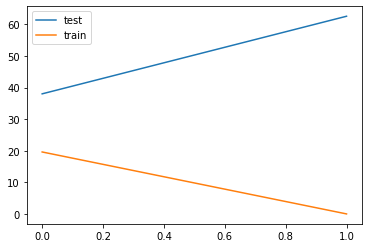

In [7]:
test_scores = grid_search.cv_results_['mean_test_score'] * - 1
train_scores = grid_search.cv_results_['mean_train_score'] * -1 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

### Predictions

-34.609375
108.2734375


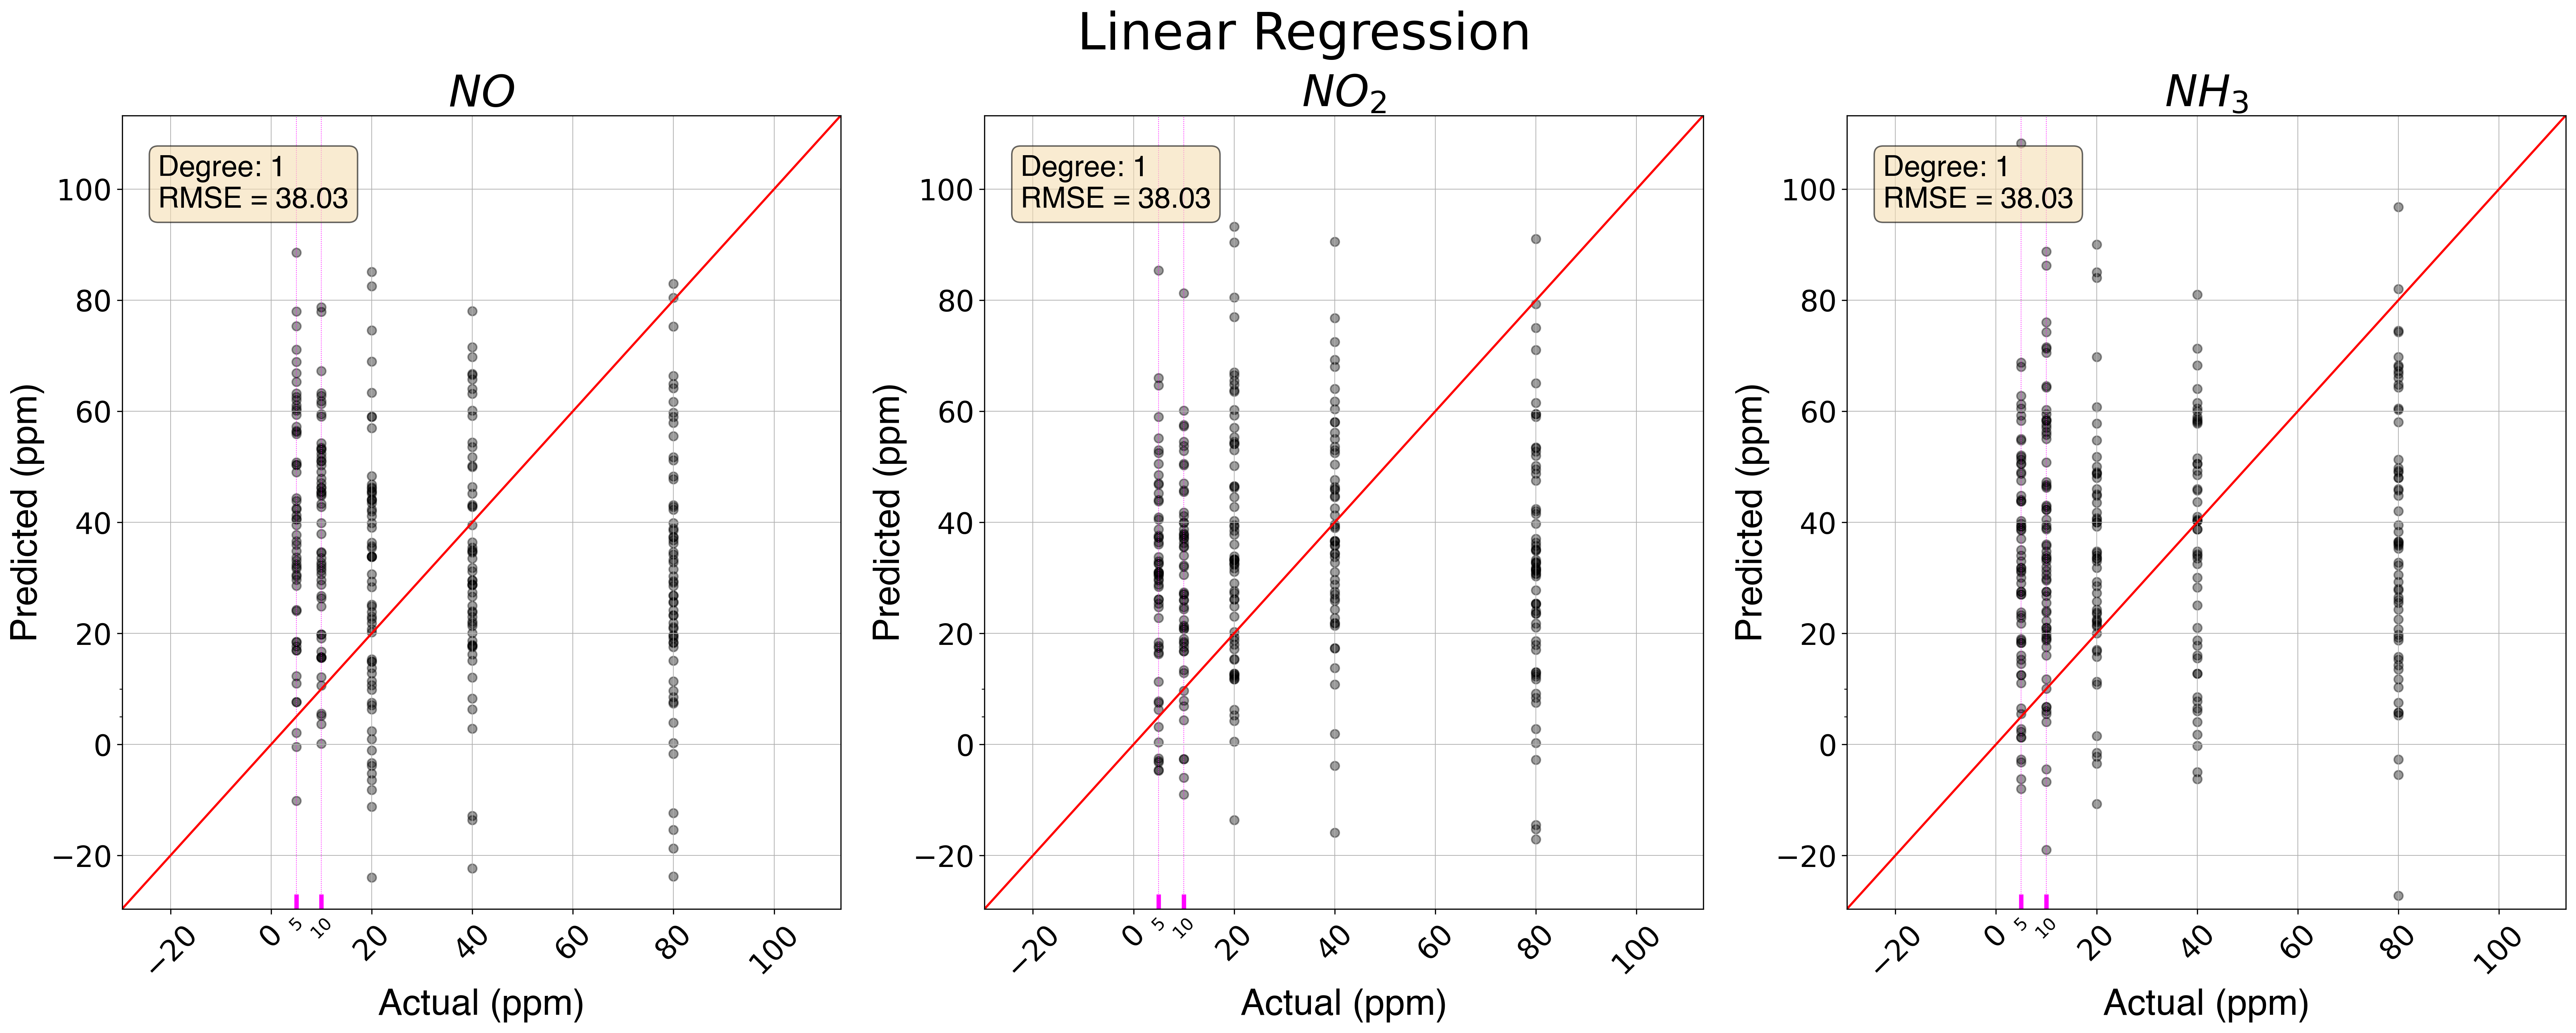

In [8]:
# Predicting on unseen validation data
y_pred = grid_search.best_estimator_.predict(X_val)

# Plotting actual vs. predicted
#Information to display
info = f"Degree: {best_params['poly__degree']}\nRMSE = {round((best_score * -1), 2)}"
plot_actual_vs_pred(y_val, y_pred, 'Linear Regression', info)    

# PCR

### Train/Test/Val split

In [9]:
# Dependent Variables - gas concentrations
y = np.asarray(sensor1.iloc[:, 1:4])

# Independent variables - shape features
X = np.asarray(sensor1.iloc[:, 4:])

# Train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Fitting pipeline to training data

In [10]:
steps = [('scaler', StandardScaler()),
         ('PCA', PCA()),
         ('poly', PolynomialFeatures()),
         ('linreg', LinearRegression())]

params = [{'PCA__n_components':list(range(1,6))}]

pipe = Pipeline(steps)

grid_search = GridSearchCV(pipe,
                           params,
                           scoring = 'neg_root_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

### CV results

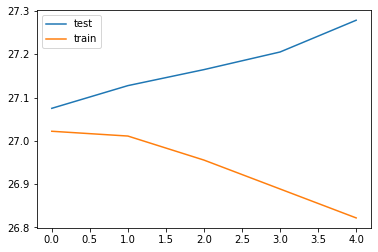

In [11]:
test_scores = grid_search.cv_results_['mean_test_score'] * - 1
train_scores = grid_search.cv_results_['mean_train_score'] * -1 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

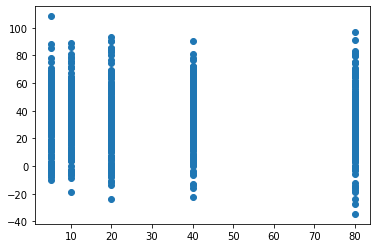

In [12]:
plt.scatter(y_val, y_pred)

### Predictions

17.895787323720498
37.99823686698553


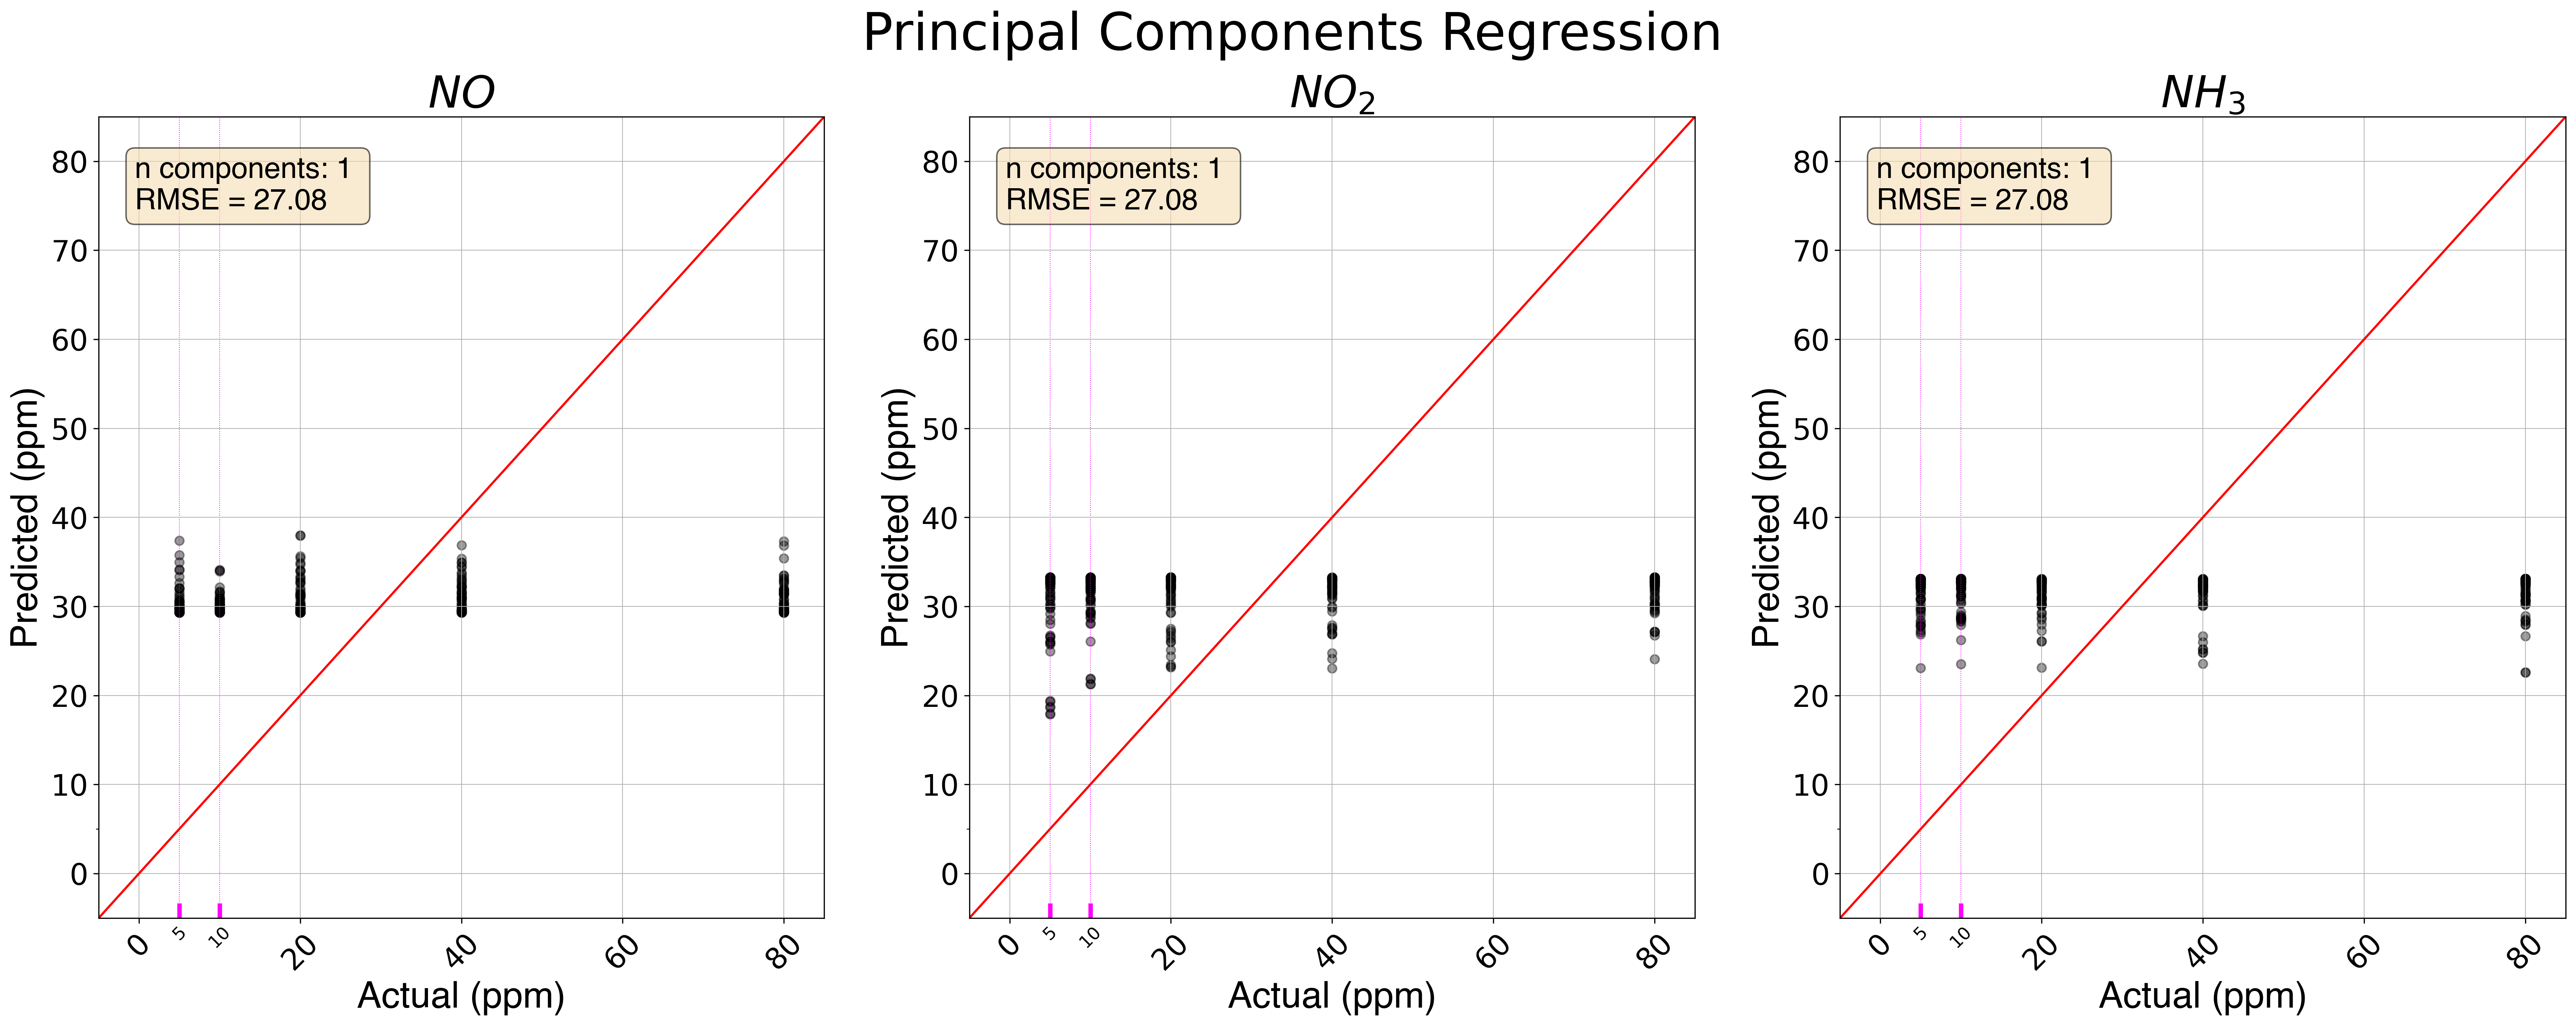

In [13]:
# Predicting on unseen validation data
y_pred = grid_search.best_estimator_.predict(X_val)

# Plotting actual vs. predicted
#Information to display
info = f"n components: {best_params['PCA__n_components']} \nRMSE = {round((best_score * -1), 2)}"
plot_actual_vs_pred(y_val, y_pred, 'Principal Components Regression', info)    

# PLSR

# Ridge